In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t)) 

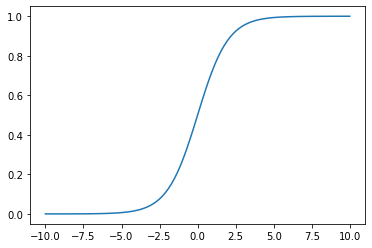

In [4]:
X = np.linspace(-10,10,100)
y = sigmoid(X)
plt.plot(X,y)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

In [6]:
X = iris.data
y = iris.target

In [7]:
# 只取前两个特征；只取y=0，1
X = X[y<2,:2]
y = y[y<2]

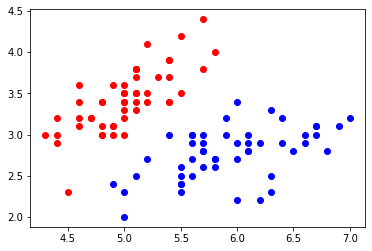

In [8]:
plt.scatter(X[y==0,0],X[y==0,1],color = 'red')
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [10]:
from LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test,y_test)

0.96

In [12]:
log_reg.predict_proba(X_test)

array([0.99167514, 0.98716291, 0.01402852, 0.14927969, 0.51597497,
       0.02164794, 0.9233433 , 0.97832045, 0.72052605, 0.00330003,
       0.90999738, 0.98818038, 0.98254047, 0.77890786, 0.98772965,
       0.98963972, 0.98711311, 0.03937993, 0.04656325, 0.77823164,
       0.97741585, 0.9533705 , 0.0134099 , 0.58186543, 0.17953898])

In [13]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0])

In [14]:
log_reg.coef_

array([ 3.0831832 , -5.29106036])

In [15]:
log_reg.intercept_

-0.445572348576842

In [16]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [17]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

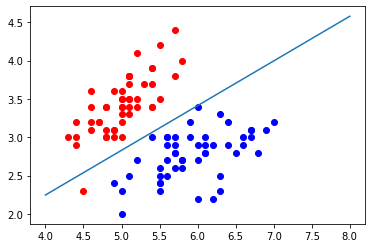

In [18]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.plot(x1_plot,x2_plot)

In [19]:
def plot_decision_boundary(model,axis):
    """
    model：模型
    axis:坐标轴的范围；0123对应的就是x轴和y轴的范围
    """
    # 使用linspace将x轴，y轴划分成无数的小点
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)

<ipython-input-19-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


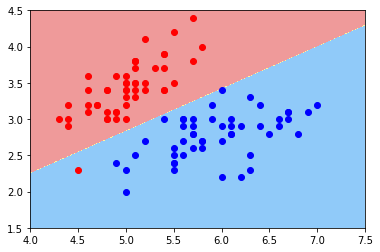

In [20]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')

# 逻辑回归中添加多项式特征

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# 模拟测试用例
np.random.seed(666)
# 两个特征的样本X
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype='int')

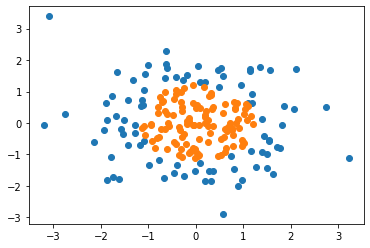

In [26]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [27]:
from LogisticRegression import LogisticRegression

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [30]:
log_reg.score(X,y)

0.605

In [31]:
def plot_decision_boundary(model,axis):
    """
    model：模型
    axis:坐标轴的范围；0123对应的就是x轴和y轴的范围
    """
    # 使用linspace将x轴，y轴划分成无数的小点
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


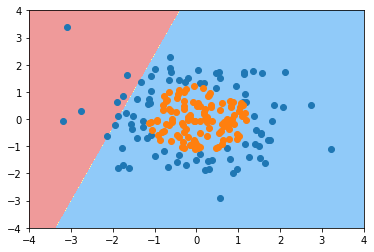

In [32]:
# 显然有非常多的错误分类，所以导致我们的分类准确度只有0.605
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
        return Pipeline([
            ('poly',PolynomialFeatures(degree=degree)),
            ('std_scaler',StandardScaler()),
            ('log_reg',LogisticRegression())
        ])

In [35]:
poly_log_reg = PolynomialLogisticRegression(2)

In [36]:
poly_log_reg.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [37]:
poly_log_reg.score(X,y)

0.95

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


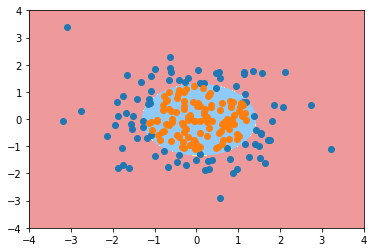

In [38]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# sklearn中的逻辑回归

In [39]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
# 决策边界是一条抛物线
y = np.array(X[:,0]**2+X[:,1]<1.5,dtype='int')
# 添加一些噪音
for _ in range(20):
    y[np.random.randint(200)] = 1

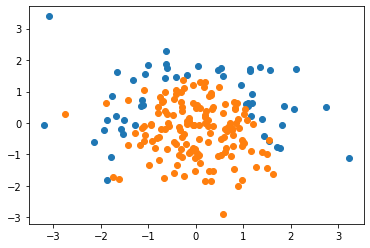

In [41]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [44]:
#效果不好，因为我们生成的数据是具有二次项的。但是我们这里使用的是线性逻辑回归
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.7933333333333333
0.86


<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


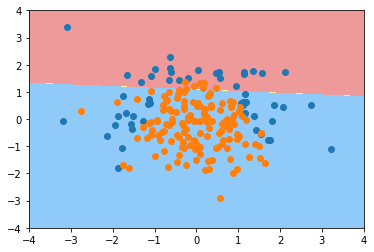

In [45]:
# 描绘线性的决策边界
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# 尝试使用多项式回归

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [47]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [48]:
poly_log_reg.score(X_train,y_train)

0.9066666666666666

In [49]:
poly_log_reg.score(X_test,y_test)

0.94

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


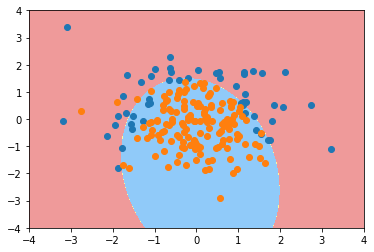

In [50]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# 尝试增大多项式项degree的值

In [51]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [52]:
poly_log_reg2.score(X_train,y_train)

0.94

In [53]:
# 模型返回能力变脆。因为出现了过拟合
poly_log_reg2.score(X_test,y_test)

0.92

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


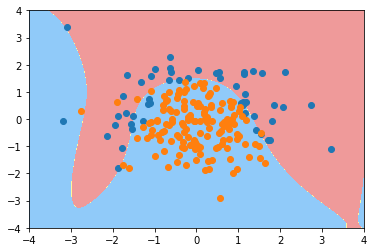

In [54]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# 尝试调整正则化超参数C

In [55]:
def PolynomialLogisticRegression(degree,C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C))
    ])

In [56]:
# C=0.1 相当于让模型正则化那一项起更大的作用
poly_log_reg3 = PolynomialLogisticRegression(degree=20,C=0.1)
poly_log_reg3.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1))])

In [57]:
poly_log_reg3.score(X_train,y_train)

0.84

In [58]:
# C=0.1 模型泛化能力并没有降低
poly_log_reg3.score(X_test,y_test)

0.92

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


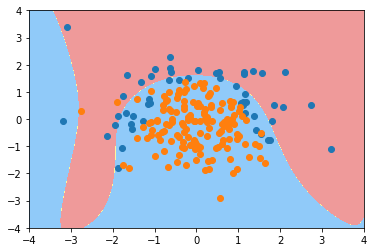

In [59]:
# 虽然边界还是比较奇怪，但是比之前degree=20要好很多
plot_decision_boundary(poly_log_reg3,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# 默认是L2正则项，尝试使用L1正则项

In [70]:
def PolynomialLogisticRegression(degree,C,penalty='l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C,penalty=penalty,solver='liblinear'))
    ])

In [71]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20,C=0.1,penalty='l1')
poly_log_reg4.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [72]:
poly_log_reg4.score(X_train,y_train)

0.8266666666666667

In [73]:
# score变低是由于数据比较简单。主要看决策边界
poly_log_reg4.score(X_test,y_test)

0.9

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


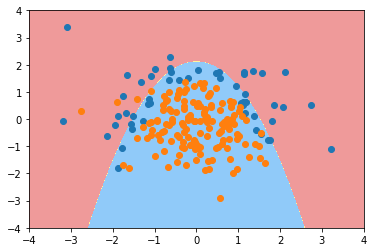

In [74]:
# 已经非常接近之前的正常的决策边界了
plot_decision_boundary(poly_log_reg4,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# OvR与OvO

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
# 为了可视化，先使用两个类别
X = iris.data[:,:2]
y = iris.target

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [77]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
# multi_class='ovr' sklearn 默认支持多分类任务，而且默认使用ovr方式

LogisticRegression()

In [78]:
# 分数不好使由于我们只使用了两个维度
log_reg.score(X_test,y_test)

0.7894736842105263

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


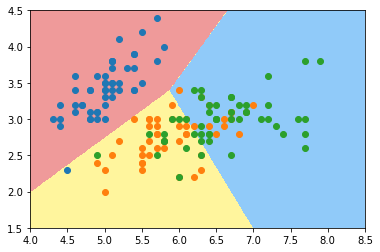

In [79]:
# 描绘三分类的决策边界
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# 使用OvO

In [80]:
# sklearn中计算logistic不是简单的使用梯度下降法，他是使用更快的一种方法，所以需要修改solver参数
# 默认solver='liblinear',为了正确的调用OvO，缓存newton-cg
log_reg2 = LogisticRegression(multi_class='multinomial',solver="newton-cg")

In [81]:
log_reg2.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [82]:
# 分类准确度比使用OvR的时候要高了很多
log_reg2.score(X_test,y_test)

0.7894736842105263

<ipython-input-31-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


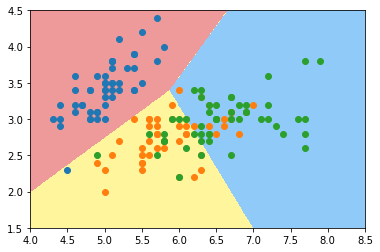

In [83]:
# 从直观的角度看，决策边界也准确了很多
plot_decision_boundary(log_reg2,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# 尝试使用所有的数据特征

In [84]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [85]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

1.0

In [86]:
log_reg2 = LogisticRegression(multi_class='multinomial',solver="newton-cg")
log_reg2.fit(X_train,y_train)
# 使用OvO的方式预测结果达到了百分之百；
# 注意：这里由于数据集比较小，耗时的差别比较小
log_reg2.score(X_test,y_test)

1.0

# 使用sklearn中的OvO and OvR

In [87]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

0.9736842105263158

In [88]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train,y_train)
ovo.score(X_test,y_test)

1.0